In [2]:
#!python -m pip install --upgrade pip

In [3]:
#!pip install scikit-image
#!pip install ipympl

In [10]:
#%matplotlib widget
%matplotlib inline

from skimage import img_as_bool, io, color, morphology
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

In [13]:
#image = img_as_bool(color.rgb2gray(io.imread('nanofibers.png')))
#image = img_as_bool(color.rgb2gray(io.imread('data/test/0010.png')))
#img_path = "data/train/thick/0001.png"
img_path = "ofda/0200.png"
image = img_as_bool(color.rgb2gray(io.imread(img_path)))
image

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

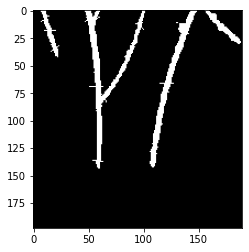

In [14]:
image = 1-image
plt.imshow(image, cmap='gray')

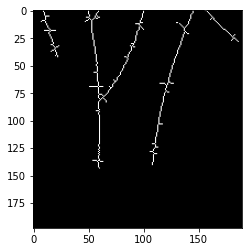

In [15]:
skeleton, distance = morphology.medial_axis(image, mask=None, return_distance=True)
skeleton
plt.imshow(skeleton, cmap='gray')

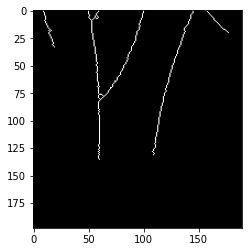

In [16]:
from pruning import *

pruned = pruning(skeleton,9)

plt.imshow(pruned, cmap="gray")
plt.show()

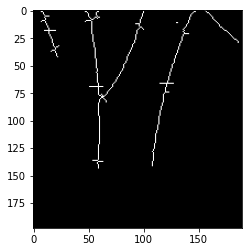

In [17]:
thinned = morphology.thin(image)

plt.imshow(thinned, cmap='gray')

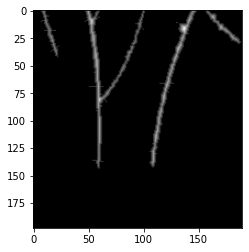

In [18]:
distanceMapNormalized = distance.copy()
cv2.normalize(distance, distanceMapNormalized, 0, 255, cv2.NORM_MINMAX)
#cv2_imshow(distanceMapNormalized)
#cv2.imwrite('distancia.png',distanceMapNormalized)

plt.imshow(distanceMapNormalized, cmap='gray')

In [19]:
target = cv2.resize(distance, (int(distance.shape[1]/8), int(distance.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64

print('distance.sum():', distance.sum())
print('target.sum():', target.sum())

distance.sum(): 4070.3020862027643
target.sum(): 3869.7182497743597


In [20]:
#distance_part = distance[8:12, 8:12]
#distance_part = distance
#cv2.normalize(distance_part, distance_part, 0, 255, cv2.NORM_MINMAX)
#distance_part = distance_part.astype(int)
#print(distance_part)
#distance_part = np.array(distance_part, dtype='uint8')
#distance_part

distance_2 = np.array(distanceMapNormalized, dtype='uint8')
target = cv2.resize(distance_2, (int(distance_2.shape[1]/8), int(distance_2.shape[0]/8)),interpolation = cv2.INTER_CUBIC)

target = np.array(target, dtype='uint32')*64

print('distance_2.sum():', distance_2.sum())
print('target.sum():', target.sum())

distance_2.sum(): 207500
target.sum(): 200064


In [21]:


#target = np.array(target, dtype='uint32')*16
#target.astype(int)

#target *= 4
#target

distance.sum(): 5726.3621007088595
target.sum(): 5216


In [39]:
#distance.sum()

target = cv2.resize(distance, (int(distance.shape[1]/8), int(distance.shape[0]/8)), interpolation = cv2.INTER_CUBIC)

print('distance.shape:', distance.shape)
print('target.shape:', target.shape)


print('distance.sum():', distance.sum())
print('target.sum():', target.sum())


distance.shape: (198, 190)
target.shape: (24, 23)
distance.sum(): 4070.3020862027643
target.sum(): 3869.7182497743597


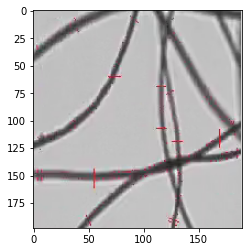

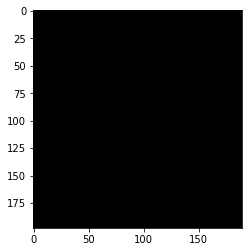

In [28]:
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
#src.shape
#src[:,:,2] = np.zeros([src.shape[0], src.shape[1]])

#red_channel = src[:,:,2]

#plt.imshow(red_channel)

lower = np.array([1,2,3])  #-- Lower range --
upper = np.array([2,5,7])  #-- Upper range --
mask = cv2.inRange(img, lower, upper)
res = cv2.bitwise_and(img, img, mask = mask)  #-- Contains pixels having the gray color--
#cv2.imshow('Result',res)
plt.imshow(res)
plt.show()

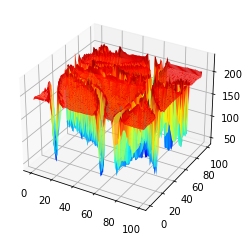

In [29]:
im = cv2.imread(img_path, 0)

im = cv2.resize(im, (100,100))
xx,yy = np.mgrid[0:im.shape[0], 0:im.shape[1]]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, im, rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0)
plt.show()

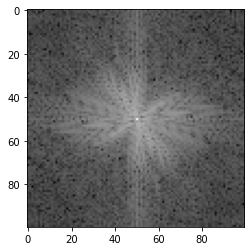

In [30]:
f = np.fft.fft2(im)
f = np.fft.fftshift(f)
magnitud = 20 * np.log(1+np.abs(f))

plt.figure()
plt.imshow(magnitud, cmap='gray')
plt.show()

In [31]:
# Guardar imagen de espectro
magnitud=np.float32(magnitud)
mag = cv2.UMat(magnitud)

cv2.normalize(magnitud, mag, 0,1, cv2.NORM_MINMAX)
mag1  = mag.get()
mag1 = (mag1 * 255).astype('uint8')

cv2.imwrite('espectro.png', mag1)

True

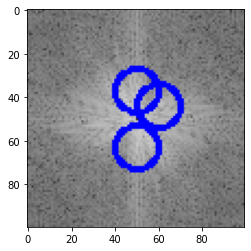

In [32]:
#Colocar las posiciones como una lista de tuplas
points = np.float32([(60,44),(50,63),(50,37)])

imgDraw = magnitud.copy()
imgDraw = imgDraw.astype(np.uint8)
imgDraw = cv2.cvtColor(imgDraw,cv2.COLOR_GRAY2RGB)

for p in points:
    cv2.circle(imgDraw, tuple(p.astype(np.int32)), 10, color=(0,0,255), thickness=2)

plt.figure()
plt.imshow(imgDraw)
plt.show()

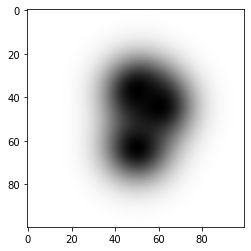

In [34]:
rows, cols = im.shape
mask = np.ones((rows, cols))
numPoints = points.shape[0]

## Cómo influye la desviación del Gaussiano en el filtrado?
desv = 15
for i in range(0, rows):
    for j in range(0, cols):
        for k in range(0, points.shape[0]):
            mask[i,j] = mask[i,j] * (1 - np.exp(-((points[k,1] - i)**2 + (points[k,0] - j)**2)/(desv**2)))

plt.figure()
plt.imshow(mask, cmap='gray')
plt.show()

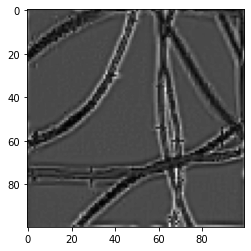

In [35]:
fshift = f * mask

f_ishift = np.fft.ifftshift(fshift)
im_back = np.fft.ifft2(f_ishift)
im_back = np.abs(im_back)

plt.figure()
plt.imshow(im_back, cmap='gray')
plt.show()

In [14]:
img_path = "ofda/0225.png"
img = cv2.imread(img_path, 0)
#img = cv2.resize(img, (img.size,100))

img = cv2.resize(img,(int(img.shape[1]/8),int(img.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64

print(type(img))
print(img.shape)
#img = img*64
#print(img.shape)

#plt.imshow(img, cmap="gray")


#plt.show()

<class 'numpy.ndarray'>
(24, 23)


In [15]:
a = np.array([1,2,3])
a = a*64

print(a)

[ 64 128 192]
